# Analiza statystyczna – Projekt Portfelowy

## Wprowadzenie
Celem projektu jest analiza danych z czterech eksperymentów, sprawdzenie hipotez statystycznych i wyciągnięcie wniosków biznesowych. Analiza obejmuje testy t-Studenta, Wilcoxona i Mann–Whitney oraz wizualizacje danych.

In [2]:
# Import bibliotek i wczytanie danych

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych

df1 = pd.read_csv('data/hw1.csv')
df2 = pd.read_csv('data/hw2.csv')
df3 = pd.read_csv('data/hw3.csv')
df4 = pd.read_csv('data/hw4.csv')

## Zadanie 1 – Porównanie wyników nauki (X vs Y)
# Hipotezy

 H₀: Średnie wyniki grup X i Y są takie same.

 H₁: Średnie wyniki grup X i Y różnią się.

In [3]:
#Sprawdzenie normalności
print("Test Shapiro-Wilka – Grupa X:", stats.shapiro(df1.X))
print("Test Shapiro-Wilka – Grupa Y:", stats.shapiro(df1.Y))

Test Shapiro-Wilka – Grupa X: ShapiroResult(statistic=np.float64(0.984373122264943), pvalue=np.float64(0.28594616875713735))
Test Shapiro-Wilka – Grupa Y: ShapiroResult(statistic=np.float64(0.9864255697754216), pvalue=np.float64(0.4001688833356286))


In [4]:
#Test statystyczny
t_stat, p_val = stats.ttest_ind(df1.X, df1.Y, equal_var=False)
print("t-stat:", t_stat, "p-value:", p_val)

if p_val < 0.05:
    print("Odrzucamy H0 → średnie różnią się")
else:
    print("Brak podstaw do odrzucenia H0 → średnie są podobne")

t-stat: -0.6292883911384963 p-value: 0.5300187896437802
Brak podstaw do odrzucenia H0 → średnie są podobne


## Wizualizacja

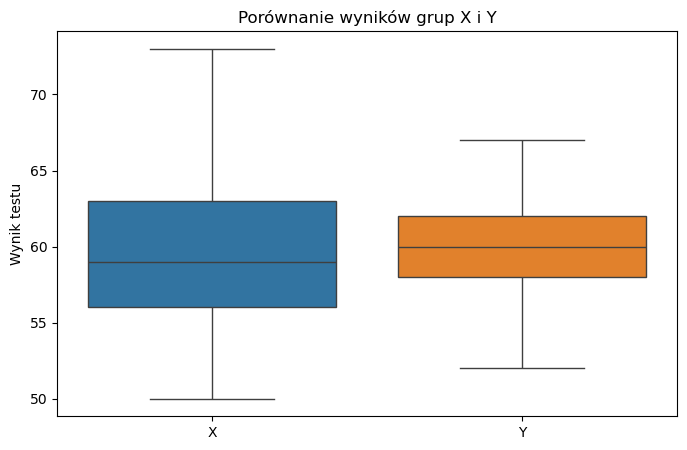

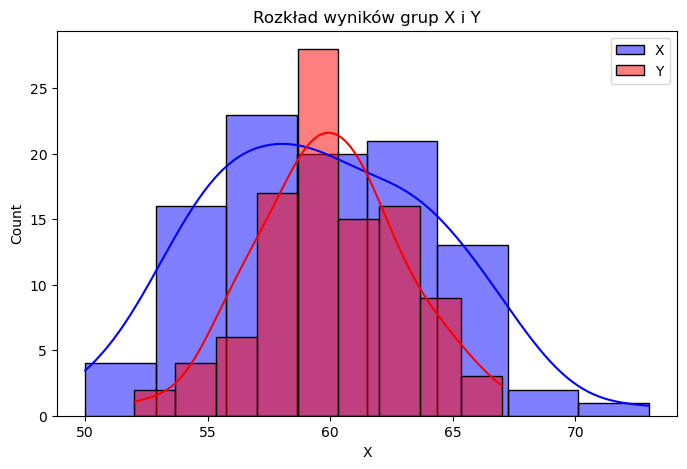

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1[['X','Y']])
plt.title("Porównanie wyników grup X i Y")
plt.ylabel("Wynik testu")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df1.X, kde=True, color='blue', label='X', alpha=0.5)
sns.histplot(df1.Y, kde=True, color='red', label='Y', alpha=0.5)
plt.title("Rozkład wyników grup X i Y")
plt.legend()
plt.show()

Komentarz biznesowy: Wyniki pokazują, że średnie wyniki grup nie różnią się istotnie. Oznacza to, że obie metody nauki X i Y są równie skuteczne.

## Zadanie 2 – Wpływ suplementu na wagę
## Hipotezy

H₀: Waga przed i po przyjmowaniu suplementu nie zmieniła się.

H₁: Waga zmniejszyła się po suplementacji.

In [6]:
#Sprawdzenie normalności
print("Przed:", stats.shapiro(df2.before))
print("Po:", stats.shapiro(df2.after))

Przed: ShapiroResult(statistic=np.float64(0.9824518487079326), pvalue=np.float64(0.5405409056995981))
Po: ShapiroResult(statistic=np.float64(0.9882315263096293), pvalue=np.float64(0.832215596623306))


In [7]:
#Test statystyczny
t_stat, p_val = stats.ttest_rel(df2.before, df2.after, alternative='greater')
print("t-stat:", t_stat, "p-value:", p_val)

if p_val < 0.05:
    print("Odrzucamy H0 → suplement znacząco obniża wagę")
else:
    print("Brak podstaw do odrzucenia H0 → brak znaczącej zmiany w wadze")

t-stat: 2.055925757507072 p-value: 0.02211135004801021
Odrzucamy H0 → suplement znacząco obniża wagę


## Wizualizacja

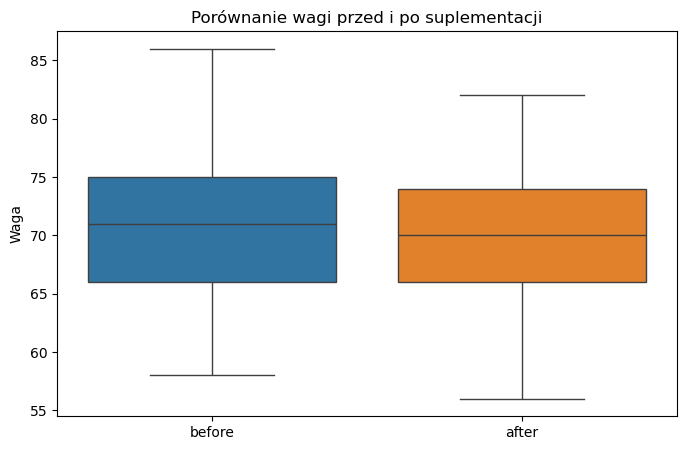

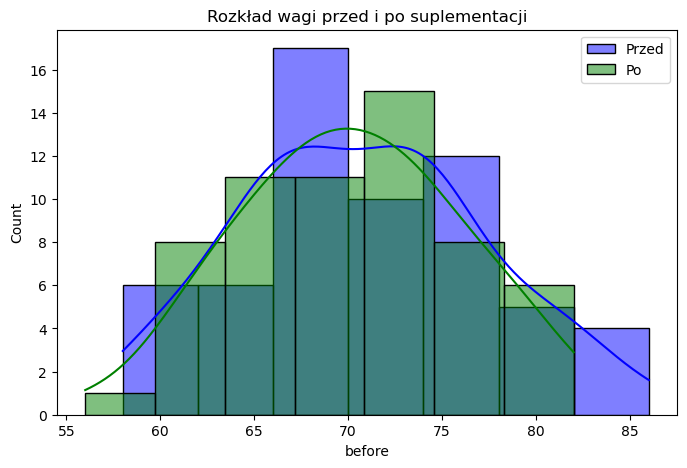

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df2[['before','after']])
plt.title("Porównanie wagi przed i po suplementacji")
plt.ylabel("Waga")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df2.before, kde=True, color='blue', label='Przed', alpha=0.5)
sns.histplot(df2.after, kde=True, color='green', label='Po', alpha=0.5)
plt.title("Rozkład wagi przed i po suplementacji")
plt.legend()
plt.show()

Komentarz biznesowy: Suplement wykazuje istotny efekt zmniejszania wagi, co może mieć zastosowanie w programach dietetycznych.

## Zadanie 3 – Aktywność użytkowników aplikacji
# Hipotezy

H₀: Częstotliwość korzystania z aplikacji nie zmieniła się.

H₁: Częstotliwość wzrosła po wprowadzeniu powiadomień.

In [9]:
#Sprawdzenie normalności
print("Przed:", stats.shapiro(df3.before))
print("Po:", stats.shapiro(df3.after))

Przed: ShapiroResult(statistic=np.float64(0.9109629581133942), pvalue=np.float64(0.001128772778236105))
Po: ShapiroResult(statistic=np.float64(0.9323505343418181), pvalue=np.float64(0.006789438723830561))


In [10]:
#Test Wilcoxona (dane nie są normalne)
w_stat, p_val = stats.wilcoxon(df3.before, df3.after, alternative='less')
print("statystyka W:", w_stat, "p-value:", p_val)

if p_val < 0.05:
    print("Odrzucamy H0 → powiadomienia zwiększyły aktywność użytkowników")
else:
    print("Brak podstaw do odrzucenia H0 → brak znaczącej zmiany")

statystyka W: 161.5 p-value: 1.6672412784258823e-05
Odrzucamy H0 → powiadomienia zwiększyły aktywność użytkowników


## Wizualizacja

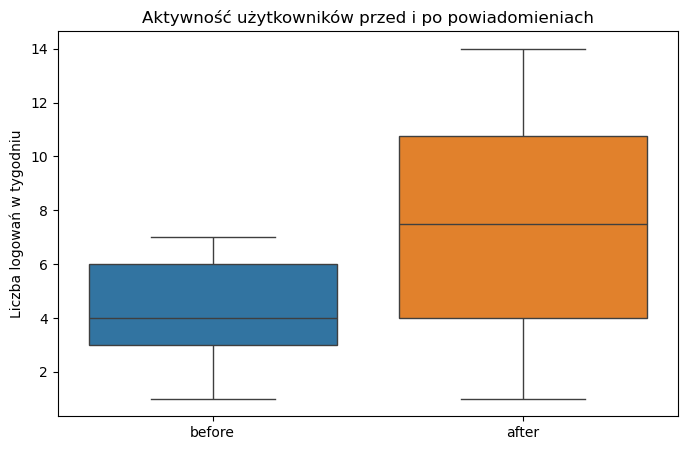

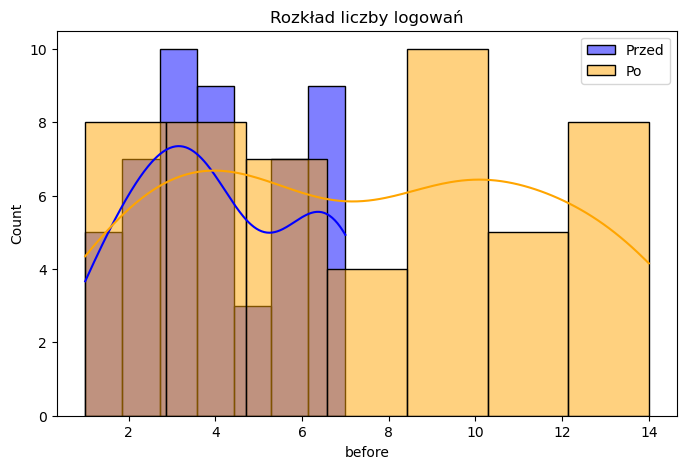

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df3[['before','after']])
plt.title("Aktywność użytkowników przed i po powiadomieniach")
plt.ylabel("Liczba logowań w tygodniu")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df3.before, kde=True, color='blue', label='Przed', alpha=0.5)
sns.histplot(df3.after, kde=True, color='orange', label='Po', alpha=0.5)
plt.title("Rozkład liczby logowań")
plt.legend()
plt.show()

Komentarz biznesowy: Powiadomienia dzienne skutecznie zwiększają zaangażowanie użytkowników, co może prowadzić do większego retention.

## Zadanie 4 – Średni koszyk na dwóch stronach
# Hipotezy

H₀: Średni koszyk jest taki sam na obu stronach.

H₁: Średni koszyk różni się.

In [13]:
#Sprawdzenie normalności
print("Site1:", stats.shapiro(df4.site1))
print("Site2:", stats.shapiro(df4.site2))

Site1: ShapiroResult(statistic=np.float64(0.8995057589416222), pvalue=np.float64(1.3402410323285949e-06))
Site2: ShapiroResult(statistic=np.float64(0.9372696707235855), pvalue=np.float64(0.00013189940318117447))


In [14]:
#Test Mann–Whitney (dane nie są normalne)
u_stat, p_val = stats.mannwhitneyu(df4.site1, df4.site2, alternative='two-sided')
print("U-stat:", u_stat, "p-value:", p_val)

if p_val < 0.05:
    print("Odrzucamy H0 → średni koszyk różni się między stronami")
else:
    print("Brak podstaw do odrzucenia H0 → średni koszyk jest podobny")

U-stat: 3889.5 p-value: 0.0066646971976911905
Odrzucamy H0 → średni koszyk różni się między stronami


## Wizualizacja

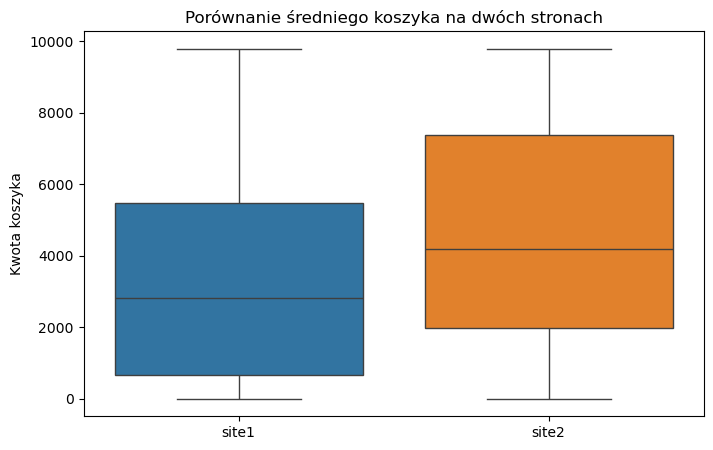

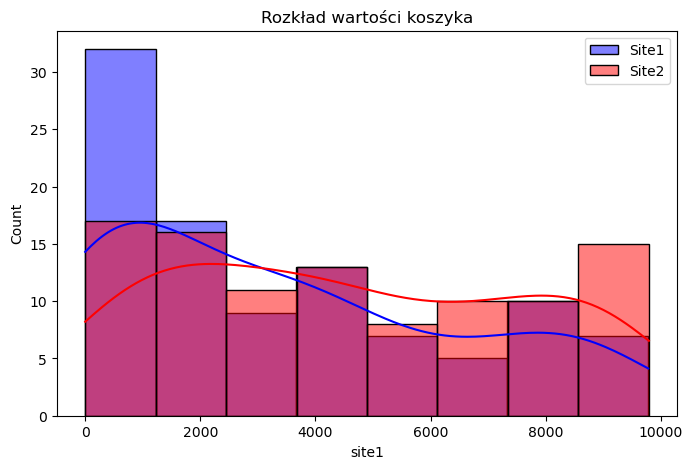

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df4[['site1','site2']])
plt.title("Porównanie średniego koszyka na dwóch stronach")
plt.ylabel("Kwota koszyka")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df4.site1, kde=True, color='blue', label='Site1', alpha=0.5)
sns.histplot(df4.site2, kde=True, color='red', label='Site2', alpha=0.5)
plt.title("Rozkład wartości koszyka")
plt.legend()
plt.show()

Komentarz biznesowy: Średni koszyk różni się między stronami, co może wpłynąć na decyzje dotyczące kanałów sprzedaży.